# Explore here

In [36]:
import pandas as pd 

total_data= pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [37]:
x= total_data[["MedInc", "Latitude","Longitude"]]

x.head()


,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [38]:
# spliting data set 

from sklearn.model_selection import train_test_split

x_train , x_test= train_test_split(x, test_size= 0.2, random_state=42)

x_train.head()


,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [39]:
# kMeans
from sklearn.cluster import KMeans

model_unsup=KMeans(n_clusters=6, n_init="auto", random_state=42)
model_unsup.fit(x_train)

KMeans(n_clusters=6, n_init='auto', random_state=42)

In [40]:
# inserting clusters

y_train=list(model_unsup.labels_)
x_train["cluster"] = y_train

x_train.head()



,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


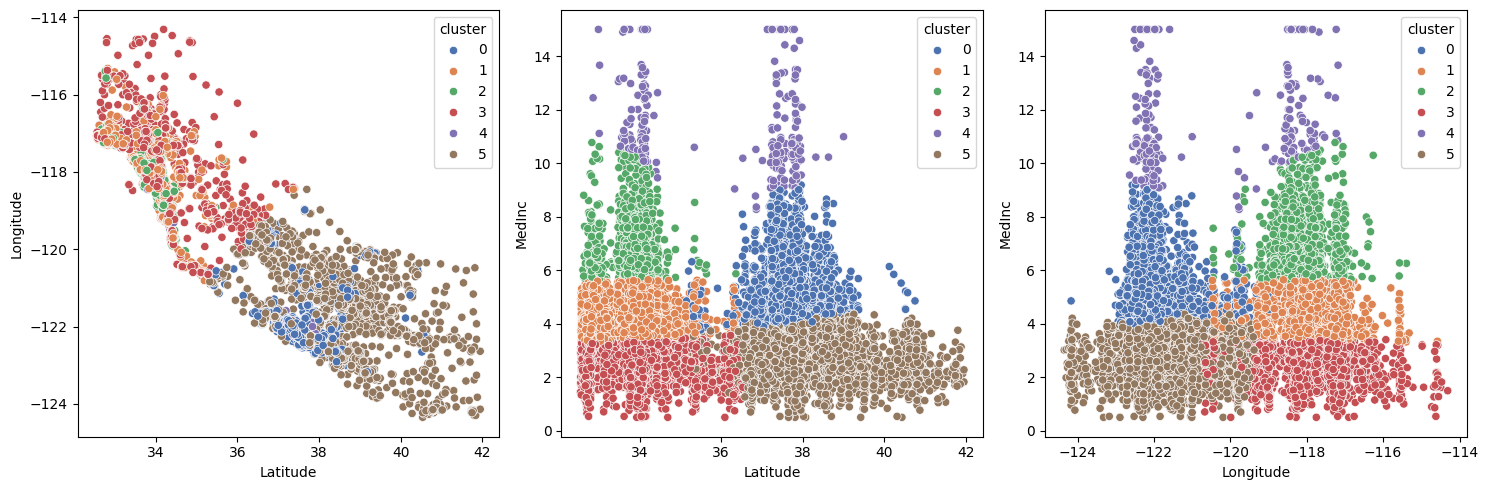

In [41]:
# plotting results 

import matplotlib.pyplot as plt 
import seaborn as sns 

fig, axis = plt.subplots(1,3, figsize=(15,5))

sns.scatterplot(ax= axis[0], data= x_train, x= "Latitude", y= "Longitude", hue="cluster", palette="deep")
sns.scatterplot(ax= axis[1], data= x_train, x= "Latitude", y= "MedInc", hue="cluster", palette="deep")
sns.scatterplot(ax= axis[2], data= x_train, x= "Longitude", y= "MedInc", hue="cluster", palette="deep")

plt.tight_layout()

plt.show()


In [42]:
y_test = list(model_unsup.predict(x_test))
x_test["cluster"]= y_test

x_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


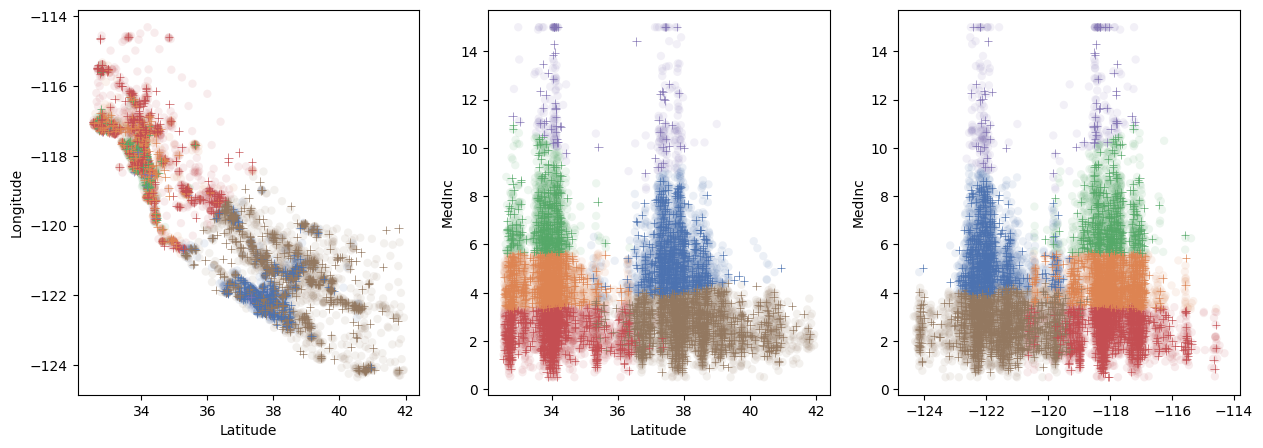

In [43]:
# ploting test results above 

fig, axis= plt.subplots(1,3, figsize =(15,5))

sns.scatterplot(ax = axis[0], data= x_train,x="Latitude",y="Longitude", hue = "cluster",palette="deep", alpha=0.1)
sns.scatterplot(ax = axis[1], data= x_train,x="Latitude",y="MedInc", hue = "cluster",palette="deep", alpha=0.1)
sns.scatterplot(ax = axis[2], data= x_train,x="Longitude",y="MedInc", hue = "cluster",palette="deep", alpha=0.1)

sns.scatterplot(ax = axis[0], data= x_test,x="Latitude",y="Longitude", hue = "cluster",palette="deep", marker="+")
sns.scatterplot(ax = axis[1], data= x_test,x="Latitude",y="MedInc", hue = "cluster",palette="deep", marker="+")
sns.scatterplot(ax = axis[2], data= x_test,x="Longitude",y="MedInc", hue = "cluster",palette="deep", marker="+")

plt.tight_layout

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()




In [44]:
# training a supervised clafacation model (decision Tree)

from sklearn.tree import DecisionTreeClassifier

model_sup = DecisionTreeClassifier(random_state=42)

model_sup.fit(x_train,y_train)


DecisionTreeClassifier(random_state=42)

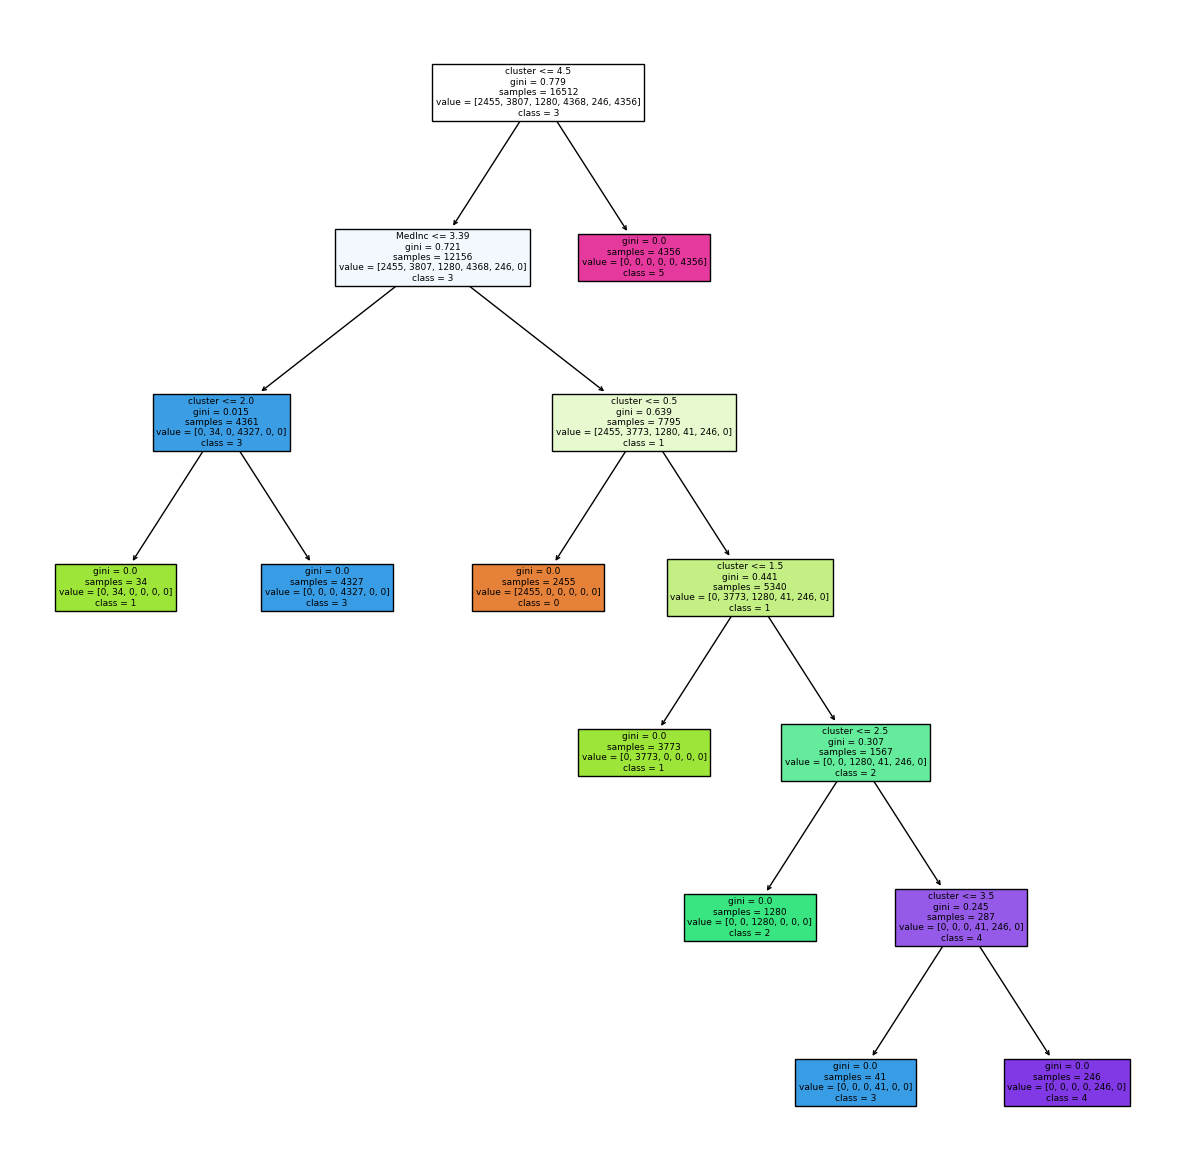

In [45]:
from sklearn import tree

fig= plt.figure(figsize=(15,15))

tree.plot_tree(model_sup, feature_names=list(x_train.columns), class_names=["0","1","2","3","4","5"],filled = True)

plt.show() 

In [46]:
y_pred=model_sup.predict(x_test)

y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [47]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

1.0

In [48]:
from pickle import dump

dump(model_unsup, open("/models/k-means_default_42.sav", "wb"))
dump(model_sup, open("/models/decision_tree_classifier_default_42.sav", "wb"))

FileNotFoundError: [Errno 2] No such file or directory: '/models/k-means_default_42.sav'